In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("deep_sea_corals.csv",low_memory=False)

In [3]:
df.shape

(13040, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13040 entries, 0 to 13039
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CatalogNumber            13039 non-null  float64
 1   DataProvider             13039 non-null  object 
 2   ScientificName           13039 non-null  object 
 3   VernacularNameCategory   13038 non-null  object 
 4   TaxonRank                13038 non-null  object 
 5   Station                  11706 non-null  object 
 6   ObservationDate          13037 non-null  object 
 7   latitude                 13039 non-null  object 
 8   longitude                13039 non-null  object 
 9   DepthInMeters            13038 non-null  float64
 10  DepthMethod              13014 non-null  object 
 11  Locality                 12131 non-null  object 
 12  LocationAccuracy         11394 non-null  object 
 13  SurveyID                 8737 non-null   object 
 14  Repository            

In [5]:
df.describe()

,CatalogNumber,DepthInMeters
count,13039.000000,13038.000000
mean,442649.180919,479.930741
std,176196.934178,429.226717
min,57.000000,-999.000000
25%,422815.500000,227.000000
50%,498138.000000,420.000000
75%,551623.500000,604.000000
max,739607.000000,6292.000000


In [6]:
df.head()

,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,degrees_north,degrees_east,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,959.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28
2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,953.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53
3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09
4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50


In [7]:
df.tail()

,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID
13035,2506.0,"Smithsonian Institution, National Museum of Na...",Balanophyllia (Balanophyllia) cyathoides,stony coral (cup coral),species,2354,1885-01-22,20.9917,-86.3958,238.0,reported,"Cozumel Island, Yucatan Channel",>1000m,NaN,"National Museum of Natural History, Smithsonia...",NaN,NaN,trawl,specimen,USNM 16103
13036,537447.0,Hawaii Undersea Research Laboratory,Enallopsammia rostrata,stony coral (branching),species,P4-151,2005-07-31,6.43065,-162.44308,765.0,reported,Kingman Reef,NaN,KOK 05-11,"Hawaii Undersea Research Laboratory, Universit...",ID by expert from video,P4-151,submersible,video observation,99094
13037,7788.0,"Smithsonian Institution, National Museum of Na...",Stephanocyathus (Stephanocyathus) diadema,stony coral (cup coral),species,3663,1962-07-28,28.93,-88.13,1532.0,averaged,"Mississippi Delta, SE Of",NaN,NaN,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 91645
13038,422377.0,"NOAA, Office of Ocean Exploration and Research",Madracis sp.,stony coral (branching),genus,NaN,2002-07-29,29.25691,-88.33831,72.0,reported,Alabama Alps,20m,Sustainable Seas Expedition 2002,"NOAA, Flower Garden Banks National Marine Sanc...",ID by non-expert from image,SSE02_173,submersible,video observation,SSE02_179_T2_1707.JPG
13039,2504.0,"Smithsonian Institution, National Museum of Na...",Balanophyllia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

CatalogNumber                 1
DataProvider                  1
ScientificName                1
VernacularNameCategory        2
TaxonRank                     2
Station                    1334
ObservationDate               3
latitude                      1
longitude                     1
DepthInMeters                 2
DepthMethod                  26
Locality                    909
LocationAccuracy           1646
SurveyID                   4303
Repository                  311
IdentificationQualifier     731
EventID                    2536
SamplingEquipment          1489
RecordType                   18
SampleID                   4454
dtype: int64

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CatalogNumber,DepthInMeters
CatalogNumber,1.000000,0.058021
DepthInMeters,0.058021,1.000000


In [10]:
df.dtypes

CatalogNumber              float64
DataProvider                object
ScientificName              object
VernacularNameCategory      object
TaxonRank                   object
Station                     object
ObservationDate             object
latitude                    object
longitude                   object
DepthInMeters              float64
DepthMethod                 object
Locality                    object
LocationAccuracy            object
SurveyID                    object
Repository                  object
IdentificationQualifier     object
EventID                     object
SamplingEquipment           object
RecordType                  object
SampleID                    object
dtype: object

In [11]:
df.count()

CatalogNumber              13039
DataProvider               13039
ScientificName             13039
VernacularNameCategory     13038
TaxonRank                  13038
Station                    11706
ObservationDate            13037
latitude                   13039
longitude                  13039
DepthInMeters              13038
DepthMethod                13014
Locality                   12131
LocationAccuracy           11394
SurveyID                    8737
Repository                 12729
IdentificationQualifier    12309
EventID                    10504
SamplingEquipment          11551
RecordType                 13022
SampleID                    8586
dtype: int64

In [12]:
df.nunique()

CatalogNumber              13039
DataProvider                  26
ScientificName               298
VernacularNameCategory         9
TaxonRank                      8
Station                     2412
ObservationDate             2123
latitude                    6470
longitude                   6608
DepthInMeters               1323
DepthMethod                    4
Locality                    1350
LocationAccuracy               6
SurveyID                     419
Repository                    25
IdentificationQualifier       25
EventID                     1146
SamplingEquipment             13
RecordType                     6
SampleID                    8491
dtype: int64

In [13]:
df = df.iloc[:5000,2:-7]

In [14]:
o = OrdinalEncoder()
for i in df.columns:
    if i == "DepthInMeters" or i == "ScientificName":
        continue
    df[i] = o.fit_transform(df[[i]])

In [15]:
mn = df["DepthInMeters"].mean()
df["DepthInMeters"].fillna(round(mn,2))
md = df["ScientificName"].mode()
df["ScientificName"].fillna(md)

0        Stichopathes sp.
1       Madrepora oculata
2       Madrepora oculata
3       Madrepora oculata
4       Madrepora oculata
              ...        
4995           Mycale sp.
4996           Mycale sp.
4997           Mycale sp.
4998           Mycale sp.
4999           Mycale sp.
Name: ScientificName, Length: 5000, dtype: object

In [16]:
for i in df.columns:
    df[i].replace("?",np.NaN,inplace=True)
    df[i].replace("None",np.NaN,inplace=True)
df.dropna(inplace=True)

In [17]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

In [18]:
y.unique()

array(['Madrepora oculata', 'Stenocyathus vermiformis',
       'Stichopathes sp.', 'Stichopathes pourtalesi',
       'Stichopathes lutkeni', 'Stichopathes cf. lutkeni',
       'Stichopathes variabilis', 'Stichopathes spiessi',
       'Stichopathes cf. pourtalesi', 'Stichopathes cf. occidentalis',
       'Stichopathes cf. echinulata', 'Stichopathes cf. abyssicola',
       'Stichopathes echinulata', 'Stichopathes euoplos',
       'Stichopathes paucispina', 'Stichopathes gracilis',
       'Stylatula elegans', 'Polymastia sp.', 'Distichopora violacea',
       'Porifera', 'Mycale sp.'], dtype=object)

In [19]:
df.dtypes

ScientificName             object
VernacularNameCategory    float64
TaxonRank                 float64
Station                   float64
ObservationDate           float64
latitude                  float64
longitude                 float64
DepthInMeters             float64
DepthMethod               float64
Locality                  float64
LocationAccuracy          float64
dtype: object

In [20]:
y=y.astype('category')
y.cat.codes

1       1
2       1
3       1
4       1
5       1
       ..
4995    2
4996    2
4997    2
4998    2
4999    2
Length: 4039, dtype: int8

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [22]:
acc={}
met=["manhattan","euclidean","minkowski"]
for i in range(1,4):
    acc[i]=[]
    for j in range(3,12):
        k=KNeighborsClassifier(n_neighbors=j,metric=met[i-1],p=i)
        k.fit(x_train,y_train)
        y_pred=k.predict(x_test)
        acc[i].append((j,accuracy_score(y_test,y_pred)))

acc

{1: [(3, 0.9851485148514851),
  (4, 0.9834983498349835),
  (5, 0.9834983498349835),
  (6, 0.9834983498349835),
  (7, 0.9818481848184818),
  (8, 0.9826732673267327),
  (9, 0.981023102310231),
  (10, 0.9843234323432343),
  (11, 0.976897689768977)],
 2: [(3, 0.9818481848184818),
  (4, 0.9801980198019802),
  (5, 0.981023102310231),
  (6, 0.9801980198019802),
  (7, 0.9793729372937293),
  (8, 0.9801980198019802),
  (9, 0.981023102310231),
  (10, 0.9818481848184818),
  (11, 0.9760726072607261)],
 3: [(3, 0.9793729372937293),
  (4, 0.9785478547854786),
  (5, 0.9785478547854786),
  (6, 0.9777227722772277),
  (7, 0.9785478547854786),
  (8, 0.981023102310231),
  (9, 0.981023102310231),
  (10, 0.9826732673267327),
  (11, 0.9760726072607261)]}

In [23]:
parameters = {'n_neighbors':(5,6,7,8,9,10,11,12), 'p':(1,2,3)}
clfr = KNeighborsClassifier()
grid = GridSearchCV(clfr, parameters,scoring='accuracy', cv=8)
grid.fit(x_train,y_train)
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(


The parameters combination that would give best accuracy is : 
{'n_neighbors': 5, 'p': 1}
The best accuracy achieved after parameter tuning via grid search is :  0.9801919783614219


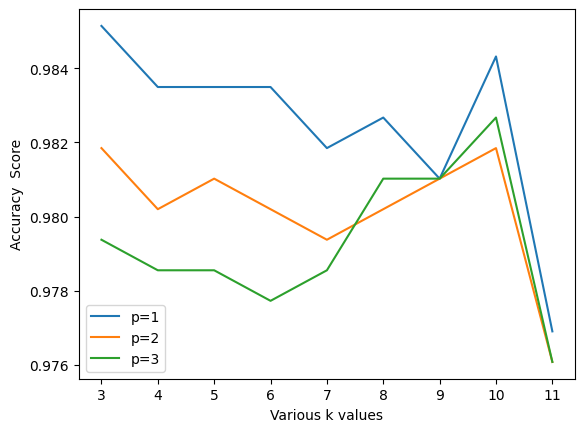

In [24]:
lab =["p=1","p=2","p=3"]
for i,j in acc.items():
    x=[]
    y=[]
    for k in j:
        x.append(k[0])
        y.append(k[1])
    plt.plot(x,y,label=lab[i-1])
plt.xlabel("Various k values")
plt.ylabel("Accuracy  Score")
plt.legend()
plt.show()

In [25]:
accuracy_score(y_test,y_pred)

0.9760726072607261

In [26]:
print(classification_report(y_test,y_pred))

                               precision    recall  f1-score   support

        Distichopora violacea       0.73      1.00      0.84         8
            Madrepora oculata       0.90      0.88      0.89        80
                   Mycale sp.       1.00      1.00      1.00       520
               Polymastia sp.       0.97      0.94      0.95        32
                     Porifera       0.87      1.00      0.93        13
     Stenocyathus vermiformis       0.00      0.00      0.00         1
  Stichopathes cf. abyssicola       0.00      0.00      0.00         1
  Stichopathes cf. echinulata       0.00      0.00      0.00         2
     Stichopathes cf. lutkeni       0.00      0.00      0.00         1
Stichopathes cf. occidentalis       0.00      0.00      0.00         1
        Stichopathes gracilis       0.00      0.00      0.00         1
         Stichopathes lutkeni       0.00      0.00      0.00         1
      Stichopathes paucispina       0.00      0.00      0.00         1
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

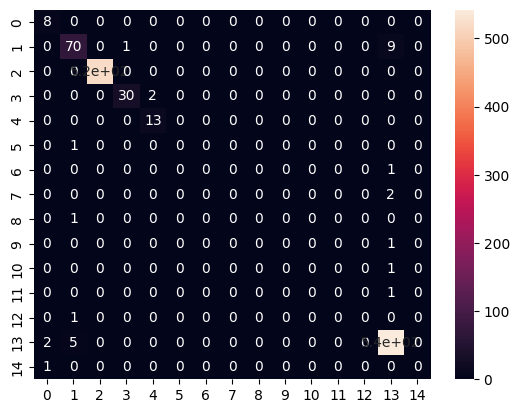

In [28]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot= True)